# Feature Engineering

**Feature Engineering** is the process of creating new features and/or transforming existing features to get the most out of your data.

#### Count vectorization 

Creates a document-term matrix where the entry of each cell will be a count of the number of times that word occurred in that document.

#### Read in text

In [4]:
import pandas as pd

data = pd.read_csv("data/SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


 We're going to work under the hypothesis that spam messages tend to be longer than real text messages. So we'll create this feature and then we'll explore whether our hypothesis is accurate.

#### Create feature for text message length

In [7]:
# Calculates the length of the text in 'body_text', counting the number of characters excluding spaces. 
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))     # x.count(" ") - count empty spaces

data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


#### Create feature for % of text that is punctuation

In [9]:
import string

# Define a function to count the percentage of punctuation characters in a text.
def count_punct(text):
    
    count = sum([1 for char in text if char in string.punctuation])
    return round(count / (len(text) - text.count(" ")), 3) * 100

# Ccreate a new column 'punct%' that contains the percentage of punctuation characters in each text.
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


#### Evaluate created features

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We're going to pass in is the starting point, which is going to be zero, and then the maximum, and in our case for body length, we'll say it won't go any higher than 200. Then we tell it how many cut points we want in there, and we'll just say 40. So this will return an array with 40 evenly spaced numbers between zero and 200, and then these will basically be used as the cut points and determine where our bins are placed. 

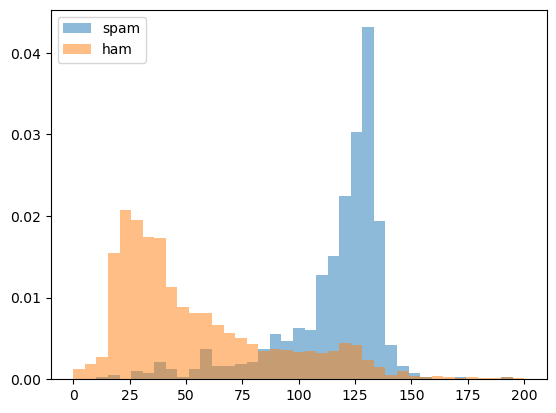

In [13]:
# Define the bins for the histogram
bins = np.linspace(0, 200, 40)

# Plot the histogram for spam emails, using the 'density' argument instead of 'normed'
plt.hist(data[data['label'] == 'spam']['body_len'], bins, alpha=0.5, density=True, label='spam')

# Plot the histogram for ham emails, using the 'density' argument instead of 'normed'
plt.hist(data[data['label'] == 'ham']['body_len'], bins, alpha=0.5, density=True, label='ham')

# Add a legend to the upper left of the plot
plt.legend(loc='upper left')

# Show the plot
plt.show()

We need to change the bins because the scale is different than it was for body length. So this is on a percentage scale. So let's make the upper bound 50. So that's saying, I'm guessing none of the text messages have greater than 50% punctuation. But we'll still leave it 40 bin, so again, this'll create an array from zero to 50 with 40 evenly spaced numbers. 

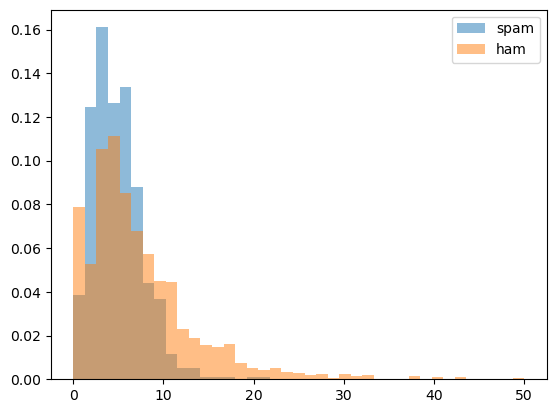

In [15]:
# Define the bins for the histogram
bins = np.linspace(0, 50, 40)       # I'm guessing none of the text messages have greater than 50% punctuation. 

# Plot the histogram for spam emails, using the 'density' argument instead of 'normed'
plt.hist(data[data['label'] == 'spam']['punct%'], bins, alpha=0.5, density=True, label='spam')

# Plot the histogram for ham emails, using the 'density' argument instead of 'normed'
plt.hist(data[data['label'] == 'ham']['punct%'], bins, alpha=0.5, density=True, label='ham')

# Add a legend to the upper left of the plot
plt.legend(loc='upper right')

# Show the plot
plt.show()

### Feature Engineering: Transformations

In [17]:
data = pd.read_csv("data/SMSSpamCollection.tsv", sep='\t')

data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


#### Create the two new features

In [19]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


#### Plot the two new features

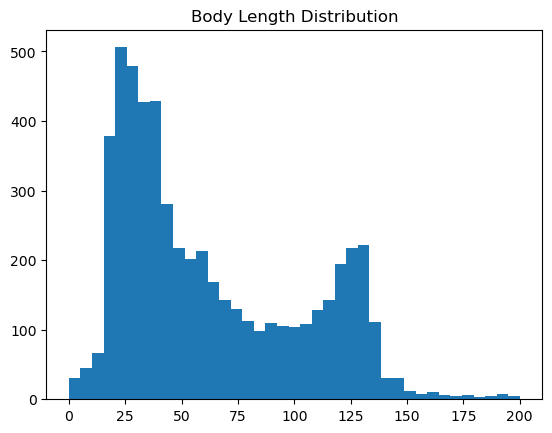

In [21]:
bins = np.linspace(0, 200, 40)  # 40 bins

plt.hist(data['body_len'], bins)
plt.title("Body Length Distribution")
plt.show()

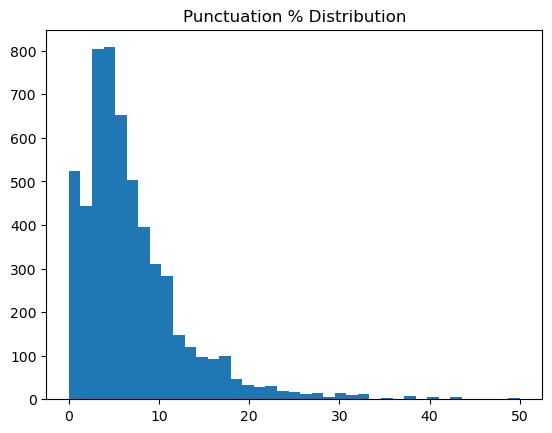

In [22]:
bins = np.linspace(0, 50, 40)

plt.hist(data['punct%'], bins)
plt.title("Punctuation % Distribution")
plt.show()

### Box-Cox Power Transformation

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |


**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

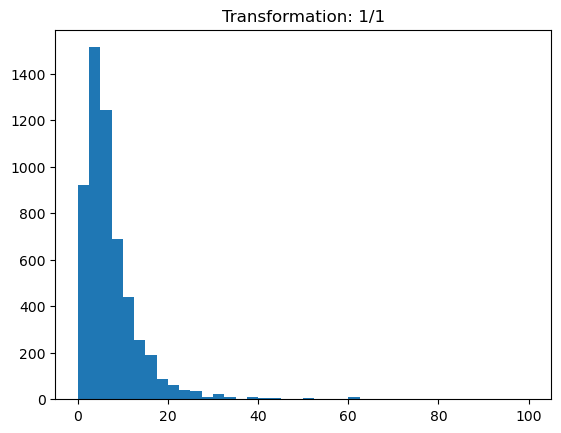

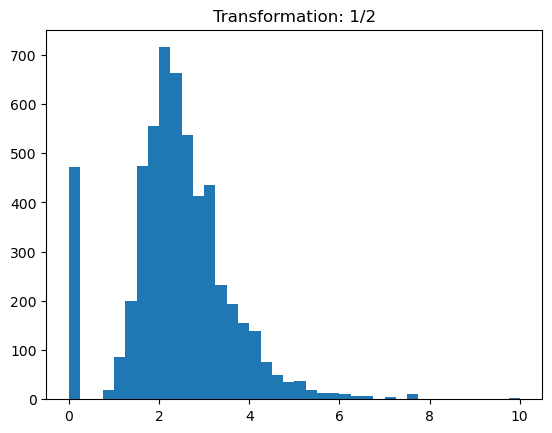

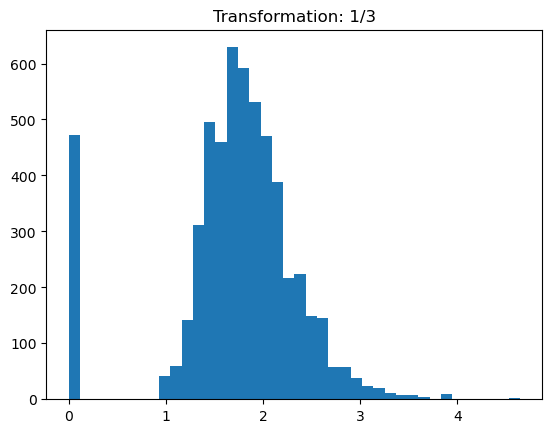

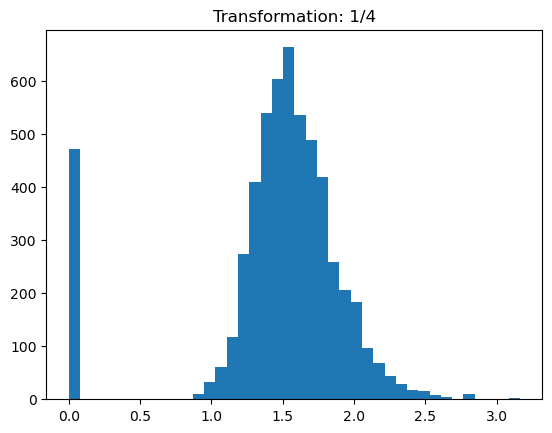

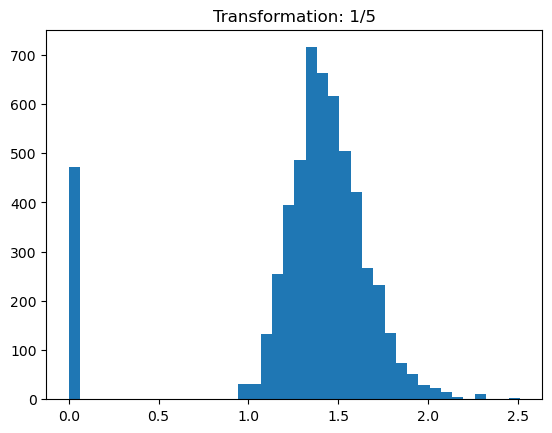

In [24]:
for i in [1, 2, 3, 4, 5]:
    plt.hist((data['punct%'])**(1/i), bins=40)
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()